## Observations and Insights 

In [167]:
%matplotlib inline
#%matplotlib notebook

In [168]:
# Julie Baker
# Pymaceuticals
# June 2021

In [169]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np 

# Study data files
mouse_metadata_path = os.path.join(os.getcwd(), "data", "Mouse_metadata.csv")
study_results_path = os.path.join(os.getcwd(), "data", "Study_results.csv")
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
allmice_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

# Display the data table for preview
allmice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [170]:
# Checking the number of mice.
unique_mice = allmice_df['Mouse ID'].nunique()

In [171]:
#J: just getting further sense of the dataset to guage how much data may be lost
# 1893/249 = 7.6; 1893/10 = 189.3
datapoints = allmice_df['Timepoint'].nunique()

In [172]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplo_rows_df = allmice_df[allmice_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
print("Duplicate Rows :")
duplo_rows_df

Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [173]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = allmice_df.loc[allmice_df['Mouse ID'] == 'g989', :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [174]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = allmice_df.loc[allmice_df['Mouse ID'] != 'g989', :]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [175]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_df['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [177]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

In [282]:
test_indexing = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

NameError: name 'index' is not defined

In [178]:
# mean tumor volue
tumor_mean_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_mean_df

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [179]:
# median tumor volume 
tumor_med_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_med_df

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [280]:
# testing another way to merge
test_df = {'Mean': tumor_mean_df,
        'Median': tumor_med_df}
test_df

{'Mean': Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.320930
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 'Median': Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.446266
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64}

In [180]:
# variance tumor volume 
tumor_var_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_var_df

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [181]:
# standard deviation tumor volume
tumor_std_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_std_df

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [244]:
# SEM of the tumor volume
tumor_sem_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_sem_df

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [249]:
# merging to single dataframe
summary_lw_df = pd.merge(tumor_mean_df,tumor_med_df, on='Drug Regimen')
summary_lw_df

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [281]:
testing_df = summary_lw_df.columns=['Drug Regimen', 'Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [ ]:
summary_lw_df = pd.merge(summary_lw_df,tumor_var_df, on='Drug Regimen')
# rename first 3 columns before merging the remaining
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median','Tumor Volume (mm3)':'Variance'})
# merge std & rename column
summary_lw_df = pd.merge(summary_lw_df,tumor_std_df, on='Drug Regimen')
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
# merge sem & rename column
summary_lw_df = pd.merge(summary_lw_df,tumor_sem_df, on='Drug Regimen')
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)':'Standard Error of Mean'})


In [184]:
## TRY TO REFORMAT DATA FRAME: number format, maybe column names

In [185]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#J: This is how I did it to start with, so I went back & wrote out the long way above.
summary1_df = clean_mice_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary1_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [186]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [187]:
# looking at clean_mice so I don't have to scroll up --TAKE OUT LATER
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [224]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# x = drug
# y = total number of timepoints
plot1_df = clean_mice_df.groupby('Drug Regimen')['Timepoint'].sum()

In [225]:
# I couldn't call the columns later on because Timepoint was missing its name, but now that I can rename these, I should be able to call it for the next step.
# not working, it's not letting me call drug regimen
plot1_df = pd.merge(plot1_df, plot1_df, on='Drug Regimen')
plot1_df

,Timepoint_x,Timepoint_y
Drug Regimen,,
Capomulin,4960,4960
Ceftamin,3515,3515
Infubinol,3235,3235
Ketapril,3705,3705
Naftisol,3650,3650
Placebo,3380,3380
Propriva,2525,2525
Ramicane,4885,4885
Stelasyn,3480,3480


In [253]:
# testing some stuff I saw in a video
plot1_df.iloc[0]

Total Timepoints    4960
Name: Capomulin, dtype: int64

In [226]:
# renaming the columns & removing the duplicate
plot1_df = plot1_df.rename(columns={'Timepoint_x':'Total Timepoints','Timepoint_y':'duplicates'})

In [227]:
# removing duplicate column
plot1_df = plot1_df.drop(columns='duplicates')
plot1_df

,Total Timepoints
Drug Regimen,
Capomulin,4960
Ceftamin,3515
Infubinol,3235
Ketapril,3705
Naftisol,3650
Placebo,3380
Propriva,2525
Ramicane,4885
Stelasyn,3480


In [228]:
plot1_again_df = plot1_df.reindex()

In [229]:
plot1_again_df

,Total Timepoints
Drug Regimen,
Capomulin,4960
Ceftamin,3515
Infubinol,3235
Ketapril,3705
Naftisol,3650
Placebo,3380
Propriva,2525
Ramicane,4885
Stelasyn,3480


# Create an array that contains the number of users each language has
users = [13000, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))

In [234]:
# plot1 in pandas
# creating an empty list for drugs
drugs = []

In [272]:
# attempting to populate with the drugs
drugs = [plot1_df.index]
drugs

[Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
        'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
       dtype='object', name='Drug Regimen')]

In [273]:
# pulling from activity Pandas.1.13 folder
x_axis = drugs
x_axis

[Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
        'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
       dtype='object', name='Drug Regimen')]

In [275]:
y_axis = (plot1_df['Total Timepoints'])
y_axis

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2525
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Total Timepoints, dtype: int64

In [ ]:
tick_locations = [value+0.4 for value in x_axis]

In [ ]:
y_axis

In [278]:
plt.bar(x=x_axis, height=y_axis)

TypeError: unhashable type: 'numpy.ndarray'

In [129]:
# pulling from activity Pandas.1.13 folder
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, plot1_df[1])
#, color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, plot1_df[1])

TypeError: 'numpy.int64' object is not iterable

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [ ]:
# plot1 in matplotlib



# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(users)+5000)

# Give our chart some labels and a tile
plt.title("Popularity of Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Number of People Using Programming Languages")

In [289]:
# creating dataframe for pie charts
mice_gender_df = clean_mice_df.groupby(['Sex'])['Mouse ID'].nunique()
mice_gender_df

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [306]:
# NOT CURRENTLY USING, CONSIDER DITCHING
# transferring counts to variables so I don't have to remember index numbers
female_count = mice_gender_df[0]
male_count = mice_gender_df[1]
female_count, male_count

(123, 125)

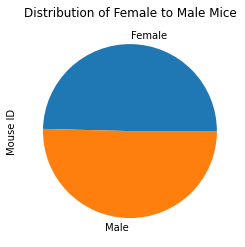

In [314]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_panda_pie = mice_gender_df.plot.pie(title= "Distribution of Female to Male Mice")

([<matplotlib.patches.Wedge at 0x11de2de80>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

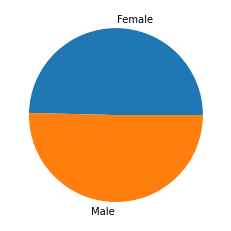

In [340]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ['Female', 'Male']
gender_counts = [(mice_gender_df[0]), mice_gender_df[1]]
plt.pie(gender_counts, labels= genders) 
# plt.axis("equal")  # ** GETTING TypeError: 'str' object is not callable
# plt.title('Distribution of Female to Male Mice')



In [331]:
# might work for something later
#female_all_df = clean_mice_df.loc[clean_mice_df['Sex'] == 'Female', :]


## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [355]:
# last/greatest timepoint for each mouse
last_timepoint_df = clean_mice_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [358]:
# inner merge with clean_mice
final_time_df = pd.merge(clean_mice_df, last_timepoint_df, on=['Mouse ID','Timepoint'], how='inner')
final_time_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [345]:
# (1) pulling the data for each of the 4 drugs; will recombine later
capomulin_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin', :]

In [346]:
# (2) pulling the data for each of the 4 drugs; will recombine later
ramicane_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Ramicane', :]


In [349]:
# (3) pulling the data for each of the 4 drugs; will recombine later
infubinol_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Infubinol', :]

In [352]:
# (4) pulling the data for each of the 4 drugs; will recombine later
ceftamin_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Ceftamin', :]

In [98]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [101]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
